<a href="https://colab.research.google.com/github/okyoujin/mission-kenya/blob/master/HW2_MLP_2D_Nomal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.2.5


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal

from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD

import time
from IPython.display import clear_output

In [0]:
def generate_2d_gaussian_data(N, title):
    # function : Making data of 2-D Gaussian distribution data
    # params : 
    #         N : number of 1-D data set 
    #         title : title of graph
    # returns :
    #         x_set : x1, x2 data 2-D metrix
    #         y_set : y data vector
    
    #x1 : -2.0 ~ 2.0 까지 행으로 N개로 나눔
    #x2 : -4.0 ~ 4.0 까지 행으로 N개로 나눔
    # x1, x2 행,열 조합 ==> N개*N개=N^2개
    x1, x2 = np.mgrid[-2.0:2.0:N, -4.0:4.0:N] 
    x1x2 = np.column_stack([x1.flat, x2.flat])

    #mean, covariance metrix
    mu = np.array([0.0, 0.0])
    covariance = np.array([[0.3, -0.5],
                           [-0.5, 2]])

    #normal propability distribution sampling
    y = multivariate_normal.pdf(x1x2, mean=mu, cov=covariance)
    y = y.reshape(x1.shape)

    #data set
    x_set = x1x2
    y_set = y.flatten()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(x1, x2, y)
    plt.title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

    return x_set, y_set


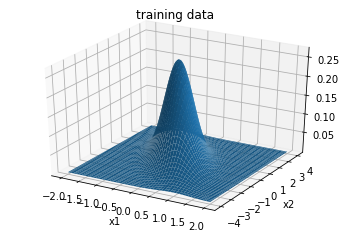

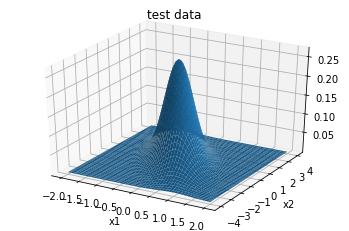

In [10]:
N = 100j
A = 50j

# training data -------------------------
x_train, y_train = generate_2d_gaussian_data(N, 'training data')

# testing data -------------------------
x_test, y_test = generate_2d_gaussian_data(A, 'test data')


In [0]:
def gauss_mlp(H):
    # function : Modeling Multi Layer Perceptron 
    # params : 
    #         H : node numbers of hidden layer
    # returns :
    #         model : MLP model
    
    # input layer : 2 input nodes
    inp = Input(shape=(2,), name='Input')

    # hidden layer : H nodes
    x = Dense(units=H, activation='sigmoid', name='hidden')(inp)

    # output layer : 1 node 
    gauss_out = Dense(units=1, activation='sigmoid', name='gauss_apxm')(x)

    # define model
    model = Model(inputs=inp, outputs=gauss_out, name='gauss_mlp')
    
    return model

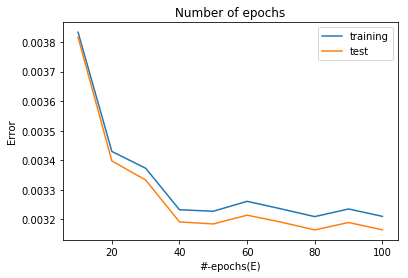

In [12]:
train_error = []
test_error = []
E_array = []

H = 10
batch_size = 20
tot_epoch = 101

for E in np.arange(10, tot_epoch, 10):
    #define the model
    model = gauss_mlp(H=H)

    #compile the model
    loss = 'mean_squared_error'
    lr = 0.01

    #Stochastic gradient descent(SGD)
    #훈련데이터중 일부를 무작위로 선정하여 gradient descent 법으로 파라미터를 학습시킴 
    model.compile(loss=loss, optimizer=SGD(lr=lr))
    #items for training
    model.fit(x_train, y_train, 
              validation_data=(x_test, y_test),
              batch_size=batch_size,
              epochs=E,
              verbose=0)

    train_error.append(model.evaluate(x_train, y_train, verbose=0))
    test_error.append(model.evaluate(x_test, y_test, verbose=0))
    E_array.append(E)

    # plot the relationship between A (training samples) and loss
    clear_output()
    plt.plot(E_array, train_error, label='training')
    plt.plot(E_array, test_error, label='test')
    plt.legend()
    plt.title('Number of epochs')
    plt.xlabel('#-epochs(E)')
    plt.ylabel('Error')
    plt.show()